In [2]:
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime as dt

In [3]:
import sys

sys.path.append("../src")
sys.path.append("../src/tests")

In [7]:
import test_subsampling as test_ss
import activity.subsampling as ss

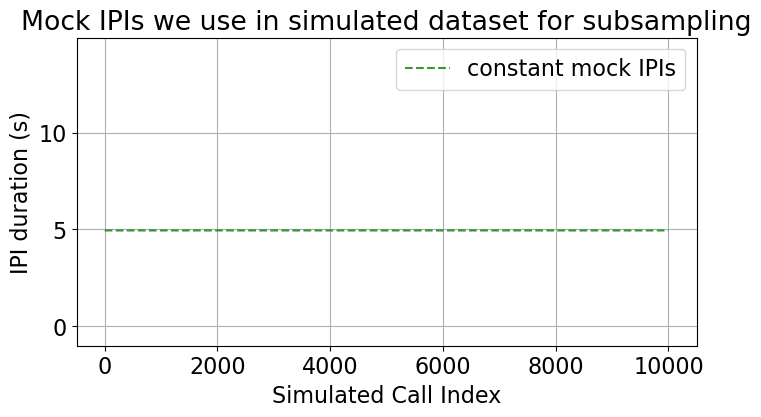

In [9]:
amplitude = 4.95
mock_constant_ipis = np.array([amplitude]*10000, dtype='float')

plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size':16})
plt.title('Mock IPIs we use in simulated dataset for subsampling')
plt.plot(mock_constant_ipis, color='green', alpha=0.8, linestyle='dashed', label='constant mock IPIs')
plt.grid(which='both')
plt.ylim(-1, (amplitude*2)+5)
plt.ylabel('IPI duration (s)')
plt.xlabel('Simulated Call Index')
plt.legend(loc='upper right')
plt.show()

In [49]:
def create_initial_mock_data_of_length(num_calls=2520):
    """
    Created a simulated dataset of calls for a period of 30-min where the provided IPIs are used to separate each call.
    """

    mock_df = pd.DataFrame()
    recording_start = dt.datetime(2022, 6, 15, 1, 00, 0)
    call_duration = 0.01
    start_time = np.linspace(0, 1800, num_calls, endpoint=False)
    end_time = start_time + call_duration
    call_start_time = recording_start + pd.to_timedelta(start_time*1e9)
    call_end_time = recording_start + pd.to_timedelta((start_time+call_duration)*1e9)
    ref_time = pd.to_datetime(call_start_time).floor('30T')
    mock_df['ref_time'] = ref_time
    mock_df['call_start_time'] = call_start_time
    mock_df['call_end_time'] = call_end_time
    mock_df['start_time'] = start_time
    mock_df['end_time'] = end_time
    mock_df['low_freq'] = [20000]*len(mock_df)
    mock_df['high_freq'] = [30000]*len(mock_df)
    mock_df['freq_group'] = 'LF1'

    return mock_df

In [51]:
data_params = dict()
cycle_lengths = [1800, 360]
percent_ons = [0.1667]
data_params["cycle_lengths"] = cycle_lengths
data_params["percent_ons"] = percent_ons
dc_tags = ss.get_list_of_dc_tags(data_params["cycle_lengths"], data_params["percent_ons"])
data_params["dc_tags"] = dc_tags

amplitude = 0.7042
mock_constant_ipis = np.array([amplitude]*10000, dtype='float')
mock_subsampling_df = create_initial_mock_data_of_length()
mock_subsampling_df

,ref_time,call_start_time,call_end_time,start_time,end_time,low_freq,high_freq,freq_group
0,2022-06-15 01:00:00,2022-06-15 01:00:00.000000000,2022-06-15 01:00:00.010000000,0.000000,0.010000,20000,30000,LF1
1,2022-06-15 01:00:00,2022-06-15 01:00:00.714285714,2022-06-15 01:00:00.724285714,0.714286,0.724286,20000,30000,LF1
2,2022-06-15 01:00:00,2022-06-15 01:00:01.428571428,2022-06-15 01:00:01.438571428,1.428571,1.438571,20000,30000,LF1
3,2022-06-15 01:00:00,2022-06-15 01:00:02.142857142,2022-06-15 01:00:02.152857142,2.142857,2.152857,20000,30000,LF1
4,2022-06-15 01:00:00,2022-06-15 01:00:02.857142857,2022-06-15 01:00:02.867142857,2.857143,2.867143,20000,30000,LF1
...,...,...,...,...,...,...,...,...
2515,2022-06-15 01:00:00,2022-06-15 01:29:56.428571428,2022-06-15 01:29:56.438571428,1796.428571,1796.438571,20000,30000,LF1
2516,2022-06-15 01:00:00,2022-06-15 01:29:57.142857142,2022-06-15 01:29:57.152857142,1797.142857,1797.152857,20000,30000,LF1
2517,2022-06-15 01:00:00,2022-06-15 01:29:57.857142857,2022-06-15 01:29:57.867142857,1797.857143,1797.867143,20000,30000,LF1
2518,2022-06-15 01:00:00,2022-06-15 01:29:58.571428571,2022-06-15 01:29:58.581428571,1798.571429,1798.581429,20000,30000,LF1


In [52]:
for dc_tag in data_params['dc_tags']:
        mock_df_subsampled = ss.simulate_dutycycle_on_detections(mock_subsampling_df.copy(), dc_tag)
        cycle_length = int(dc_tag.split('of')[-1])
        time_on = int(dc_tag.split('of')[0])
        assert(len(mock_df_subsampled)*(cycle_length/time_on) == len(mock_subsampling_df))